# WeatherPy - Tyler Hill

In [2]:
import pandas as pd
import requests
import json
import random
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [3]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Create lists to store values from for-loop
lats = []
lons = []
cities = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Declare number of samples to calculate
num_samples = 1800

for x in range(num_samples):
    
    # Randomly generate Latitude and Longitude, append values
    lat = random.uniform(-90,90)
    lon = random.uniform(-180,180)
    
    # Grab nearest city from Lat + Lon, then append 'cities' list
    city = citipy.nearest_city(lat, lon)
    f_city = city.city_name.title()
    f_country = city.country_code.upper()
    city_country = f'{f_city}, {f_country}'
    if city_country not in cities:
        cities.append(city_country)
# Display number of cities collected
print(f'{len(cities)} unique cities collected')

703 unique cities collected


In [7]:
# Lists to store new Latitudes and Longitudes for each city + city name
city = []
c_lats = []
c_lons = []

# Loop through cities list, trying to gather weather data for each city
for i, response in enumerate(cities):
    # Building URL and json() response for each iteration
    q_url = f'{url}&units={units}&q={cities[i]}&APPID={weather_api_key}'
    response = requests.get(q_url).json()
    # Try to collect data from weather API and append to respective lists
    try:
        # Collect values for each variable
        temp = response["main"]["temp"]
        humid = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        latc = response["coord"]["lat"]
        lonc = response["coord"]["lon"]
        
        # Append variables to lists
        c_lats.append(latc)
        c_lons.append(lonc)
        city.append(cities[i])
        temperature.append(temp)
        humidity.append(humid)
        cloudiness.append(cloud)
        wind_speed.append(wind)
        
        # Print city and index number for each successful data retrieval
        print(f'[{i}]: {cities[i]}')
        
    # Skip any cities that encounter error or have incomplete data
    except:
        print("Error Retrieving Data, skipping...")
        pass
print("-----------------------")
print("Data retrieval complete")
print(f'Data retrieved for {len(city)} cities')

[0]: Pangai, TO
[1]: Bengkulu, ID
[2]: Hambantota, LK
[3]: Kaoma, ZM
Error Retrieving Data, skipping...
[5]: Carnarvon, AU
[6]: Mehamn, NO
[7]: Vaini, TO
[8]: Ushuaia, AR
[9]: Albany, AU
[10]: Rikitea, PF
[11]: Bredasdorp, ZA
[12]: Inuvik, CA
[13]: College, US
[14]: Victoria, SC
[15]: Puerto Ayora, EC
Error Retrieving Data, skipping...
[17]: Punta Arenas, CL
[18]: Yeppoon, AU
[19]: Saint-Philippe, RE
[20]: Zyryanovsk, KZ
[21]: Hobart, AU
Error Retrieving Data, skipping...
[23]: Provideniya, RU
[24]: Zambezi, ZM
[25]: Arraial Do Cabo, BR
[26]: Gimli, CA
[27]: Chitrakonda, IN
[28]: Jamestown, SH
[29]: Vestmannaeyjar, IS
Error Retrieving Data, skipping...
[31]: Tuktoyaktuk, CA
[32]: Mikhaylovka, KZ
[33]: Umm Lajj, SA
[34]: Shingu, JP
[35]: Comodoro Rivadavia, AR
[36]: Guane, CU
[37]: Fort Nelson, CA
[38]: Kapaa, US
[39]: Katobu, ID
[40]: Qaanaaq, GL
[41]: Kodiak, US
Error Retrieving Data, skipping...
[43]: Jalu, LY
[44]: Busselton, AU
[45]: Chulym, RU
[46]: Caravelas, BR
[47]: Bluff, NZ
[

[375]: Boguchany, RU
[376]: Ca Mau, VN
[377]: Kurumkan, RU
[378]: San Andres, CO
[379]: Wrzesnia, PL
Error Retrieving Data, skipping...
[381]: Morehead, PG
[382]: Booue, GA
[383]: Klaksvik, FO
[384]: Tautira, PF
[385]: Nangong, CN
[386]: Oriximina, BR
[387]: Sinnamary, GF
[388]: Zihuatanejo, MX
[389]: Plettenberg Bay, ZA
[390]: Luderitz, NA
[391]: Ketchikan, US
[392]: Cayenne, GF
[393]: Port Blair, IN
Error Retrieving Data, skipping...
[395]: Tessalit, ML
[396]: Lebedinyy, RU
Error Retrieving Data, skipping...
[398]: Malanje, AO
[399]: Mazagao, BR
[400]: Samana, DO
Error Retrieving Data, skipping...
[402]: Canico, PT
[403]: Nayudupeta, IN
[404]: Camacupa, AO
Error Retrieving Data, skipping...
[406]: Nenjiang, CN
[407]: Yarada, IN
[408]: Praia, CV
[409]: Nieuw Amsterdam, SR
[410]: Ballangen, NO
[411]: Laishevo, RU
[412]: Nalut, LY
[413]: Noshiro, JP
[414]: Wencheng, CN
[415]: Daru, PG
[416]: Harindanga, IN
[417]: Juneau, US
[418]: Nelson Bay, AU
Error Retrieving Data, skipping...
[420]:

In [10]:
# Build dataframe from collected values
df = pd.DataFrame({
    "City": city,
    "Latitude": c_lats,
    "Longitude": c_lons,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
})

# Display dataframe
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,"Pangai, TO",-19.8000,-174.3500,77.81,72,100,8.43
1,"Bengkulu, ID",-3.8004,102.2655,77.02,89,99,6.76
2,"Hambantota, LK",6.1241,81.1185,81.72,79,79,2.82
3,"Kaoma, ZM",-14.7833,24.8000,67.86,68,80,5.37
4,"Carnarvon, AU",-24.8667,113.6333,68.07,83,40,3.44


In [11]:
# Write DataFrame to csv
output_file = "Output/WeatherPy.csv"
df.to_csv(output_file,index=False, header=True)

In [12]:
# Declare column values for ease of use
c_lats = df["Latitude"]
c_lons = df["Longitude"]
temps = df["Temperature"]
humids = df["Humidity"]
clouds = df["Cloudiness"]
winds = df["Wind Speed"]

In [13]:
# Determine max and min values to determine xlim for each plot
clat_min = c_lats.min()
clat_max = c_lats.max()

# temp_min = temps.min()
# temp_max = temps.max()

# humid_min = humids.min()
# humid_max = humids.max()

# cloud_min = clouds.min()
# cloud_max = clouds.max()

# wind_min = winds.min()
# wind_max = winds.max()

# Scatter Plots

In [95]:
# Lists created to store values for plotting function
# Lists of each variable to plot
thcw = [temps, humids, clouds, winds]
# Variable strings
names = ["Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)",]
# .png output filenames
save_fig = ["Output/Images/temperature_vs_lat.png","Output/Images/humidity_vs_lat.png","Output/Images/cloudiness_vs_lat.png","Output/Images/windspeed_vs_lat.png"]
colors = ["dodgerblue","teal","cornflowerblue", "thistle"]
line_colors = ["darksalmon","darksalmon","darksalmon","lightcoral"]
# font_colors = ["tomato","dodgerblue","darksalmon","darksalmon"]
font_loc = [95,50,50,6.5]
explanation = [
    f"The above figure plots the relationship between Temperature and Latitude for all cities collected. This is the only plot of the four with a noteable correlation, which is skewed due to the over-representation of the Northern Hemisphere in the data.",
    "Above is a plot of the relationship between Humidity and Latitude for all cities collected.",
    "The above figure plots the relationship between Cloudiness and Latitude for all cities collected.",
    "Above is a plot of the relationship between Wind Speed and Latitude for all cities collected.",
]

In [98]:
# Plotting function to plot four different variables against Latitude:
# Temp, Humidity, Cloudiness, Windspeed
def plot():
    for i in range(len(thcw)):
        fig = plt.scatter(c_lats, thcw[i], c=colors[i], marker='o')
        plt.ylabel(names[i])
        plt.xlabel('Latitude')
        plt.xlim(clat_min+2,clat_max+2)
        plt.title(f'{names[i]} vs Latitude')
        
        slope, int, r, p, std_err = stats.linregress(c_lats, thcw[i])
        y = slope * c_lats + int
        line = plt.plot(c_lats,y,c=line_colors[i], linewidth=2)
        line_str = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
        plt.annotate(line_str,(-40,font_loc[i]),fontsize=12,color="tomato")
        plt.savefig(save_fig[i])
        
        plt.show()
        print(f'Plot created for {names[i]} vs. Latitude')
        print("")
        print(explanation[i])
        print("---------------------")
        print(f'      r_value = {round(r,2)}')
        print('')
        slope, int, r, p, std_err = [0,0,0,0,0]
        plt.clf()
        
#     figure, axis = plt.subplots(2,2,figsize=(10,10))
#     axis[0, 0].scatter(c_lats, thcw[0], c=colors[0])
#     axis[0, 0].set_title(names[0])
#     axis[0, 1].scatter(c_lats, thcw[1], c=colors[1])
#     axis[0, 1].set_title(names[1])
#     axis[1, 0].scatter(c_lats, thcw[2], c=colors[2])
#     axis[1, 0].set_title(names[2])   
#     axis[1, 1].scatter(c_lats, thcw[3], c=colors[3])
#     axis[1, 1].set_title(names[3])
    
    print("---------------------")
    print("")
    print("Plotting Complete: Four plots created in /Output/Images folder")

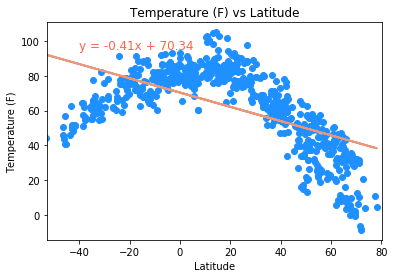

Plot created for Temperature (F) vs. Latitude

The above figure plots the relationship between Temperature and Latitude for all cities collected. This is the only plot of the four with a noteable correlation, which is skewed due to the over-representation of the Northern Hemisphere in the data.
---------------------
      r_value = -0.59



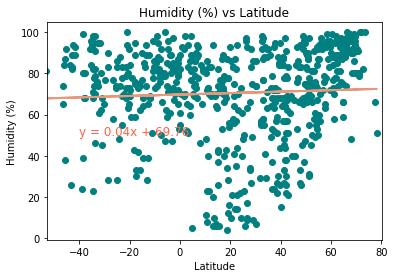

Plot created for Humidity (%) vs. Latitude

Above is a plot of the relationship between Humidity and Latitude for all cities collected.
---------------------
      r_value = 0.05



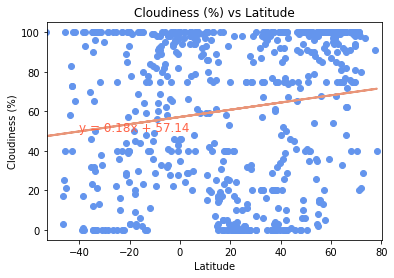

Plot created for Cloudiness (%) vs. Latitude

The above figure plots the relationship between Cloudiness and Latitude for all cities collected.
---------------------
      r_value = 0.16



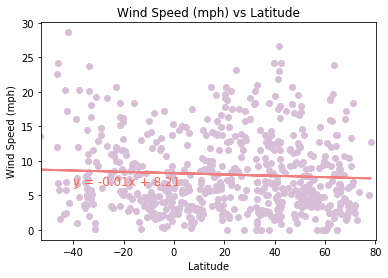

Plot created for Wind Speed (mph) vs. Latitude

Above is a plot of the relationship between Wind Speed and Latitude for all cities collected.
---------------------
      r_value = -0.06

---------------------

Plotting Complete: Four plots created in /Output/Images folder


<Figure size 432x288 with 0 Axes>

In [99]:
# Run plot function to create plots
plot()

# Separate values into Northern and Southern Hemispheres

In [100]:
hemisphere = []
for index, row in df.iterrows():
    lat = row["Latitude"]
    if lat >= 0:
        hem = "Northern"
        hemisphere.append(hem)
    elif lat < 0:
        hem = "Southern"
        hemisphere.append(hem)
df["Hemisphere"] = hemisphere
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere
0,"Pangai, TO",-19.8000,-174.3500,77.81,72,100,8.43,Southern
1,"Bengkulu, ID",-3.8004,102.2655,77.02,89,99,6.76,Southern
2,"Hambantota, LK",6.1241,81.1185,81.72,79,79,2.82,Northern
3,"Kaoma, ZM",-14.7833,24.8000,67.86,68,80,5.37,Southern
4,"Carnarvon, AU",-24.8667,113.6333,68.07,83,40,3.44,Southern


In [101]:
# .loc to separate into Northern and Southern Hemispheres
n_hem = df.loc[(df["Hemisphere"]) == "Northern"]
s_hem = df.loc[(df["Hemisphere"]) == "Southern"]

In [102]:
# Declaring lat, long, temp, humidity, cloudiness, windspeed values for respective hemispheres
n_lats = n_hem["Latitude"]
s_lats = s_hem["Latitude"]
n_longs = n_hem["Longitude"]
s_longs = s_hem["Longitude"]
n_temps = n_hem["Temperature"]
s_temps = s_hem["Temperature"]
n_humids = n_hem["Humidity"]
s_humids = s_hem["Humidity"]
n_clouds = n_hem["Cloudiness"]
s_clouds = s_hem["Cloudiness"]
n_winds = n_hem["Wind Speed"]
s_winds = s_hem["Wind Speed"]

In [122]:
# lists created to store respective hemispheres for n_plot and s_plot functions
northern = [n_temps, n_humids, n_clouds, n_winds]
southern = [s_temps, s_humids, s_clouds, s_winds]

# Output filepaths for n_plot and s_plot functions
n_save = ["Output/Images/Northern Hemisphere/temperature_vs_lat.png","Output/Images/Northern Hemisphere/humidity_vs_lat.png","Output/Images/Northern Hemisphere/cloudiness_vs_lat.png","Output/Images/Northern Hemisphere/windspeed_vs_lat.png"]
s_save = ["Output/Images/Southern Hemisphere/temperature_vs_lat.png","Output/Images/Southern Hemisphere/humidity_vs_lat.png","Output/Images/Southern Hemisphere/cloudiness_vs_lat.png","Output/Images/Southern Hemisphere/windspeed_vs_lat.png"]

# Explanation strings to provide further information and analysis after each plot
exp_n = [
    "The above plot shows the relationship of Temperature and Latitude for the Northern Hemisphere. As expected, there is a strong negative correlation with temperatures increasing upon approach to the equator (latidude=0). This correlation is negative due to the nature of the Northern Hemisphere values approaching the equator from above.",
    "This plot shows the relationship of Humidity and Latitude for the Northern Hemisphere. There is a weak correlation with higher latitudes being more likely to have high humidity, though with lower latitudes still capable of having high humidity, but being more likely than higher latitudes to have low humidity.",
    "This plot shows the relationship between Cloudiness and Latitude for the Northern Hemisphere.",
    "The above plot shows the relationship between Wind Speed and Latitude for the Northern Hemisphere. There doesn't appear to be any correlation between the two variables. Interestingly, the wind speeds around Latitude=40 tend to be the highest.",
]
exp_s = [
    "The above plot shows the relationship of Temperature and Latitude for the Southern Hemisphere. As expected, there is a strong positive correlation with temperatures increasing upon approach to the equator (latidude=0). This correlation is positive due to the nature of the Southern Hemisphere values approaching the equator from below.",
    "This plot shows the relationship of Humidity and Latitude for the Southern Hemisphere.",
    "This plot shows the relationship between Cloudiness and Latitude for the Southern Hemisphere.",
    "The above plot shows the relationship between Wind Speed and Latitude for the Southern Hemisphere. A very weak correlation appears to show higher wind speeds being slightly more likely to appear the further you move from the equator.",
]

In [123]:
def n_plot():
    for i in range(len(northern)):
        fig = plt.scatter(n_lats, northern[i], c=colors[i], marker='o')
        plt.ylabel(names[i])
        plt.xlabel('Latitude')
        plt.xlim(0,n_lats.max())

        slope, int, r, p, std_err = stats.linregress(n_lats, northern[i])
        y = slope*n_lats+int
        line = plt.plot(n_lats,y,c="r", linewidth=2)

        line_str = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
        plt.annotate(line_str,(40,25),fontsize=12,color="r")

        plt.savefig(n_save[i])

        plt.show()
        print(f'Plot created for {names[i]} vs. Latitude (Northern Hemisphere)')
        print("")
        print(exp_n[i])
        print("---------------------")
        print(f'      r_value = {round(r,2)}')
        print('')
        slope, int, r, p, std_err = [0,0,0,0,0]
        plt.clf()
    print("---------------------")
    print("")
    print("Plotting Complete: Four plots created in /Output/Images/Northern Hemisphere/ folder")

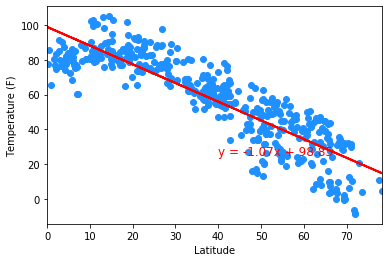

Plot created for Temperature (F) vs. Latitude (Northern Hemisphere)

The above plot shows the relationship of Temperature and Latitude for the Northern Hemisphere. As expected, there is a strong negative correlation with temperatures increasing upon approach to the equator (latidude=0). This correlation is negative due to the nature of the Northern Hemisphere values approaching the equator from above.
---------------------
      r_value = -0.88



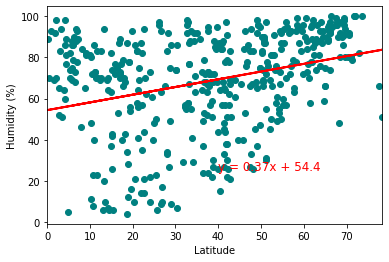

Plot created for Humidity (%) vs. Latitude (Northern Hemisphere)

This plot shows the relationship of Humidity and Latitude for the Northern Hemisphere. There is a weak correlation with higher latitudes being more likely to have high humidity, though with lower latitudes still capable of having high humidity, but being more likely than higher latitudes to have low humidity.
---------------------
      r_value = 0.31



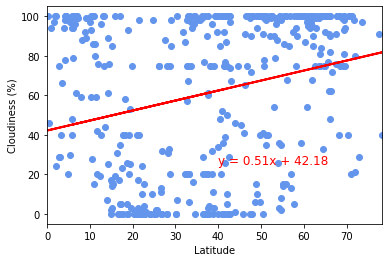

Plot created for Cloudiness (%) vs. Latitude (Northern Hemisphere)

This plot shows the relationship between Cloudiness and Latitude for the Northern Hemisphere.
---------------------
      r_value = 0.26



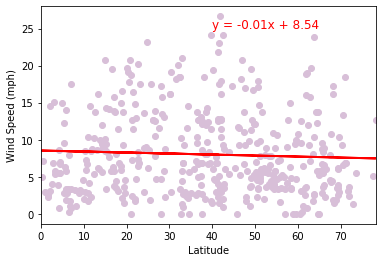

Plot created for Wind Speed (mph) vs. Latitude (Northern Hemisphere)

The above plot shows the relationship between Wind Speed and Latitude for the Northern Hemisphere. There doesn't appear to be any correlation between the two variables. Interestingly, the wind speeds around Latitude=40 tend to be the highest.
---------------------
      r_value = -0.05

---------------------

Plotting Complete: Four plots created in /Output/Images/Northern Hemisphere/ folder


<Figure size 432x288 with 0 Axes>

In [124]:
# Run n_plot function to plot Northern Hemisphere
n_plot()

In [126]:
# y Locations for regression line plot annotation
font_loc2 = [70, 60, 30, 12.5]

In [133]:
def s_plot():
    for x in range(len(southern)):
        fig = plt.scatter(s_lats, southern[x], c=colors[x], marker='o')
        plt.ylabel(names[x])
        plt.xlabel('Latitude')
        plt.xlim(s_lats.min(),0)

        slope, int, r, p, std_err = stats.linregress(s_lats, southern[x])
        y = slope*s_lats+int
        line = plt.plot(s_lats,y,c="r", linewidth=2)

        line_str = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
        plt.annotate(line_str,(-40,font_loc2[x]),fontsize=12,color="r")
        plt.savefig(s_save[x])

        plt.show()
        print(f'Plot created for {names[x]} vs. Latitude (Southern Hemisphere)')
        print("")
        print(exp_s[x])
        print("---------------------")
        print(f'      r_value = {round(r,2)}')
        print('')
        slope, int, r, p, std_err = [0,0,0,0,0]
        plt.clf()

    print("---------------------")
    print("")
    print("Plotting Complete: Four plots created in /Output/Images/Southern Hemisphere/ folder")

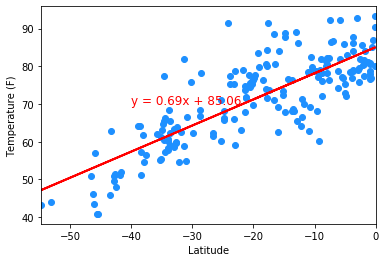

Plot created for Temperature (F) vs. Latitude (Southern Hemisphere)

The above plot shows the relationship of Temperature and Latitude for the Southern Hemisphere. As expected, there is a strong positive correlation with temperatures increasing upon approach to the equator (latidude=0). This correlation is positive due to the nature of the Southern Hemisphere values approaching the equator from below.
---------------------
      r_value = 0.81



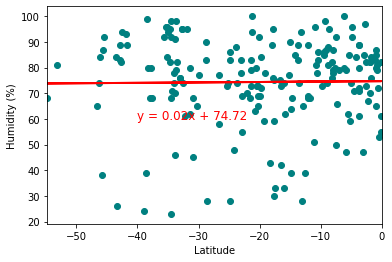

Plot created for Humidity (%) vs. Latitude (Southern Hemisphere)

This plot shows the relationship of Humidity and Latitude for the Southern Hemisphere.
---------------------
      r_value = 0.01



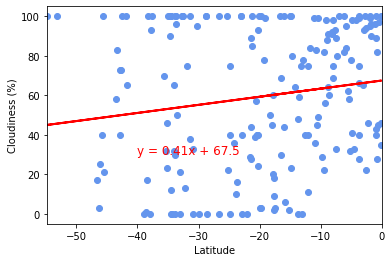

Plot created for Cloudiness (%) vs. Latitude (Southern Hemisphere)

This plot shows the relationship between Cloudiness and Latitude for the Southern Hemisphere.
---------------------
      r_value = 0.16



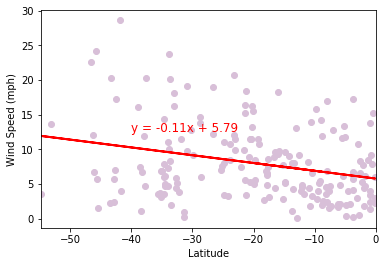

Plot created for Wind Speed (mph) vs. Latitude (Southern Hemisphere)

The above plot shows the relationship between Wind Speed and Latitude for the Southern Hemisphere. A very weak correlation appears to show higher wind speeds being slightly more likely to appear the further you move from the equator.
---------------------
      r_value = -0.28

---------------------

Plotting Complete: Four plots created in /Output/Images/Southern Hemisphere/ folder


<Figure size 432x288 with 0 Axes>

In [134]:
# Run s_plot function to plot Southern Hemisphere
s_plot()